In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from numpy.typing import NDArray
from typing import Union, Literal
import glob

plt.rcdefaults()
plt.rc('font', family='serif')
plt.rc('mathtext', fontset='cm')


In [2]:
folder002 = 'C:\\Users\\bow-lab\\Documents\\Code\\results\\ABAB\\ABAB_4\\results_25501\\results_*_dt002.pkl'
folder004 = 'C:\\Users\\bow-lab\\Documents\\Code\\results\\ABAB\\ABAB_4\\results_25501\\results_*_dt004.pkl'

files002 = glob.glob(folder002)
files004 = glob.glob(folder004)
    
print('files found:')
for file in files002:
    print(file)
for file in files004:
    print(file)

files found:
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_A_1_dt002.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_A_2_dt002.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_B_1_dt002.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_B_2_dt002.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_A_1_dt004.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_A_2_dt004.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_B_1_dt004.pkl
C:\Users\bow-lab\Documents\Code\results\ABAB\ABAB_4\results_25501\results_B_2_dt004.pkl


{'dt_min': 0, 'dt_max': 0.02, 'pdf_difference': 9.390090226658046, 'pdf_difference_err': 0.0, 'Cramer-Von Mises': 1.826177733277708, 'Cramer-Von Mises_err': 0.0, 'Wasserstein': 3.9800530879218936, 'Wasserstein_err': 0.0, 'STTC_avg': 0.2532553357506206, 'STTC_std': 0.2427147357231657}
{'dt_min': 0, 'dt_max': 0.02, 'pdf_difference': 17.337667373144804, 'pdf_difference_err': 0.0, 'Cramer-Von Mises': 1.3225512336757461, 'Cramer-Von Mises_err': 0.0, 'Wasserstein': 3.7968996729125255, 'Wasserstein_err': 0.0, 'STTC_avg': 0.17041040078303563, 'STTC_std': 0.21100923808958114}
{'dt_min': 0, 'dt_max': 0.02, 'pdf_difference': 27.491082224028712, 'pdf_difference_err': 0.0, 'Cramer-Von Mises': 1.2520850383511961, 'Cramer-Von Mises_err': 0.0, 'Wasserstein': 4.406593986758155, 'Wasserstein_err': 0.0, 'STTC_avg': 0.1258448835379445, 'STTC_std': 0.1936172103479971}
{'dt_min': 0, 'dt_max': 0.02, 'pdf_difference': 29.393012419370283, 'pdf_difference_err': 0.0, 'Cramer-Von Mises': 0.8862406017877257, 'Cram

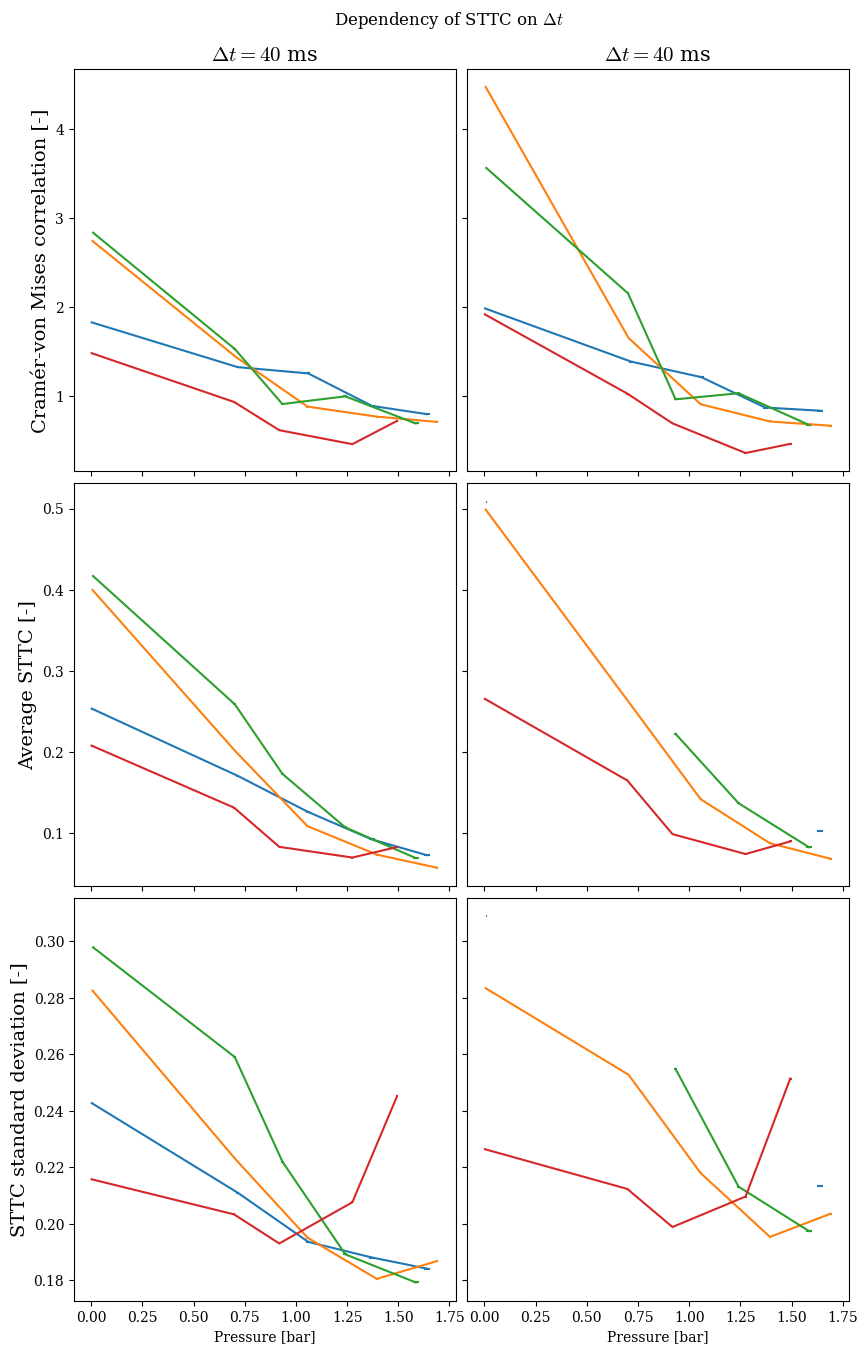

In [3]:
correlation_plot = 'Cramer-Von Mises'

fig, ax = plt.subplots(3, 2, sharex=True, sharey='row', figsize=(10, 16))
plt.subplots_adjust(wspace=.03, hspace=.03)
plt.suptitle(r'Dependency of STTC on $\Delta t$', y=.917)

for file in files002:
    with open(file, 'rb') as file:
        data = pickle.load(file)
        pressures = []
        pressure_err = []
        N_units = []
        T_total = []
        N_firings = []
        rates = np.array([])
        corr = np.array([])
        corr_err = np.array([])
        sttc_avg = []
        sttc_std = []
        sttc_dts = []
        sc = []
        sc_err = []
        dt = []
        dt_err = []

        for i, d in enumerate(data):
            pressures.append(0.06894757*d['pressure'])
            pressure_err.append(0.06894757*d['pressure_err'])
            N_units.append(d['N_units'])
            T_total.append(d['T_total'])
            N_firings.append(d['N_firings'])
            rates = np.append(rates, np.mean(d['rate_total']))

            corr = np.append(corr, d['correlation'][0][correlation_plot])
            corr_err = np.append(corr_err, d['correlation'][0][correlation_plot+'_err'])
            sttc_avg.append(d['correlation'][0]['STTC_avg'])
            sttc_std.append(d['correlation'][0]['STTC_std'])
            sttc_dts.append(d['sttc_dt'])

            sc.append(d['SC_max'])
            sc_err.append(d['SC_max_err'])
            dt.append(d['SC_dt_max'])
            dt_err.append(d['SC_dt_max_err'])
            print(d['correlation'][0])
        print()

    ax[0,0].set_title(r'$\Delta t = 40$ ms', fontsize=15)
    ax[0,0].set_ylabel('Cramér-von Mises correlation [-]', fontsize=14)
    ax[0,0].errorbar(pressures, corr, xerr=pressure_err)

    ax[1,0].set_ylabel('Average STTC [-]', fontsize=14)
    ax[1,0].errorbar(pressures, sttc_avg, xerr=pressure_err)

    ax[2,0].set_ylabel('STTC standard deviation [-]', fontsize=14)
    ax[2,0].errorbar(pressures, sttc_std, xerr=pressure_err)
    ax[2,0].set_xlabel('Pressure [bar]')

for file in files004:
    with open(file, 'rb') as file:
        data = pickle.load(file)
        pressures = []
        pressure_err = []
        N_units = []
        T_total = []
        N_firings = []
        rates = np.array([])
        corr = np.array([])
        corr_err = np.array([])
        sttc_avg = []
        sttc_std = []
        sttc_dts = []
        sc = []
        sc_err = []
        dt = []
        dt_err = []

        for i, d in enumerate(data):
            pressures.append(0.06894757*d['pressure'])
            pressure_err.append(0.06894757*d['pressure_err'])
            N_units.append(d['N_units'])
            T_total.append(d['T_total'])
            N_firings.append(d['N_firings'])
            rates = np.append(rates, np.mean(d['rate_total']))

            corr = np.append(corr, d['correlation'][0][correlation_plot])
            corr_err = np.append(corr_err, d['correlation'][0][correlation_plot+'_err'])
            sttc_avg.append(d['correlation'][0]['STTC_avg'])
            sttc_std.append(d['correlation'][0]['STTC_std'])
            sttc_dts.append(d['sttc_dt'])

            sc.append(d['SC_max'])
            sc_err.append(d['SC_max_err'])
            dt.append(d['SC_dt_max'])
            dt_err.append(d['SC_dt_max_err'])

            print(d['correlation'][0])
        print()

    ax[0,1].set_title(r'$\Delta t = 40$ ms', fontsize=15)
    ax[0,1].errorbar(pressures, corr, xerr=pressure_err)

    ax[1,1].errorbar(pressures, sttc_avg, xerr=pressure_err)

    ax[2,1].errorbar(pressures, sttc_std, xerr=pressure_err)
    ax[2,1].set_xlabel('Pressure [bar]')